In [ ]:
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt

In [ ]:
df = pd.read_csv('DATASET.csv')
print (df)

      -0.424303395
0        -0.269274
1        -0.011706
2         0.249525
3        -0.121569
4         0.430189
...            ...
5992      0.331200
5993     -0.385353
5994     -0.818702
5995     -0.517189
5996     -0.236427

[5997 rows x 1 columns]


In [ ]:
import pandas as pd
import fbprophet
import matplotlib.pyplot as plt
%matplotlib inline

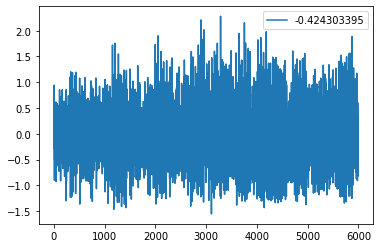

In [ ]:
df.plot()

In [ ]:
df.head()

,-0.424303395
0,-0.269274
1,-0.011706
2,0.249525
3,-0.121569
4,0.430189


In [ ]:

df.tail()

,-0.424303395
5992,0.331200
5993,-0.385353
5994,-0.818702
5995,-0.517189
5996,-0.236427


In [ ]:
df.reset_index(drop=True)

,-0.424303395
0,-0.269274
1,-0.011706
2,0.249525
3,-0.121569
4,0.430189
...,...
5992,0.331200
5993,-0.385353
5994,-0.818702
5995,-0.517189


In [ ]:
df.columns

Index(['-0.424303395'], dtype='object')

In [ ]:
df['lag_1'] = df['-0.424303395'].shift(1)
data = df['lag_1']
data.head()

0         NaN
1   -0.269274
2   -0.011706
3    0.249525
4   -0.121569
Name: lag_1, dtype: float64

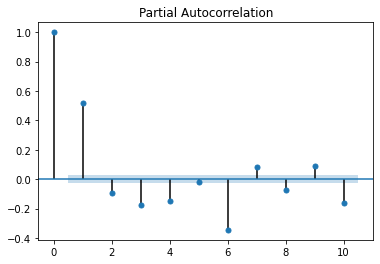

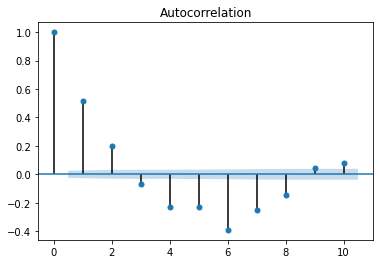

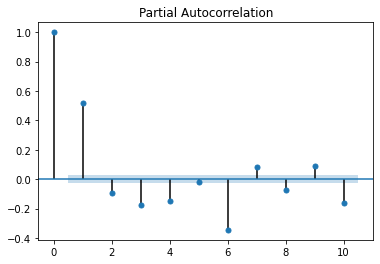

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
plot_acf(data[1:], lags=10)
plot_pacf(data[1:], lags=10)

In [ ]:
df.shape

(5997, 2)

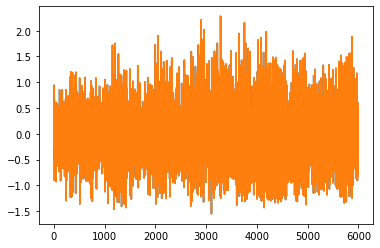

In [ ]:
fig, ax = plt.subplots()
df.plot(legend=False, ax=ax)
plt.show()

In [ ]:
df_stats = df.describe()
df_stats = df_stats.transpose()
df_stats


,count,mean,std,min,25%,50%,75%,max
-0.424303395,5997.0,-0.000584,0.578179,-1.555003,-0.398789,-0.010473,0.381365,2.280443
lag_1,5996.0,-0.000545,0.578219,-1.555003,-0.398839,-0.010473,0.381367,2.280443


In [ ]:
def norm(x):
  return(x - df_stats['mean']) / df_stats['std']
df_new = norm(df)


In [ ]:
from numpy import asarray
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(df)
print(scaled)

[[0.33522279        nan]
 [0.40237753 0.33522279]
 [0.47048708 0.40237753]
 ...
 [0.19197259 0.30495805]
 [0.27058501 0.19197259]
 [0.34378685 0.27058501]]


In [ ]:
sf= scaled

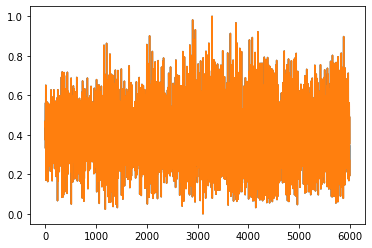

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
data = scaled
newdata = np.squeeze(data) 
plt.plot(newdata) # plotting by columns
plt.show()

In [ ]:
data

array([[0.33522279,        nan],
       [0.40237753, 0.33522279],
       [0.47048708, 0.40237753],
       ...,
       [0.19197259, 0.30495805],
       [0.27058501, 0.19197259],
       [0.34378685, 0.27058501]])

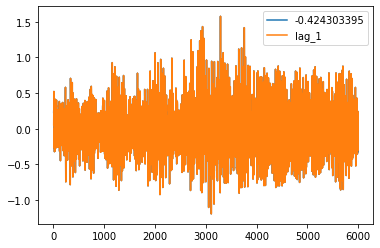

In [ ]:
df[1:].rolling(window =5).mean().plot()

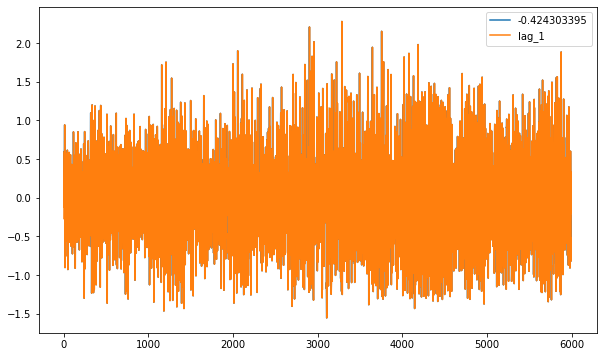

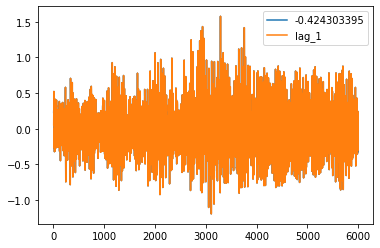

In [ ]:
df[1:].plot(figsize=(10,6))
df[1:].rolling(window =5).mean().plot()

In [ ]:
df[1:] = df[1:].rolling(window=5).mean()
df.tail(30)

,-0.424303395,lag_1
5967,-0.004250,-0.184181
5968,0.233788,-0.004250
5969,0.379295,0.233788
5970,0.431542,0.379295
5971,0.408348,0.431542
5972,0.324608,0.408348
5973,0.135643,0.324608
5974,0.045311,0.135643
5975,-0.009132,0.045311
5976,-0.026466,-0.009132


In [ ]:
from scipy import stats

In [ ]:
df_train = data[1:]

In [ ]:
df_test = data[1:]


In [ ]:
train_labels = []

In [ ]:
window_size = 10
step_size = 1

# creating overlaping windows of size window-size 100
for i in range(0, df_train.shape[0] - window_size, step_size):
    xs = df_train[1:][i: i + 100]

    label = stats.mode(df_train[1:][i: i + 100])[0][0]


In [ ]:
train_labels.append(label)

In [ ]:
x_list = [df_train]

In [ ]:
  x_list.append(xs)

In [ ]:
X_train = pd.DataFrame()

In [ ]:
X_train['x_mean'] = pd.Series(x_list).apply(lambda x: x.mean())

In [ ]:
X_train['x_mean'] 

0    0.405288
1    0.394455
Name: x_mean, dtype: float64

In [ ]:
X_train['x_std'] = pd.Series(x_list).apply(lambda x: x.std())

In [ ]:
X_train['x_std']

0    0.150744
1    0.115601
Name: x_std, dtype: float64

In [ ]:
X_train['x_min'] = pd.Series(x_list).apply(lambda x: x.min())

In [ ]:
X_train['x_min'] 

0    0.00000
1    0.14646
Name: x_min, dtype: float64

In [ ]:
X_train['x_max'] = pd.Series(x_list).apply(lambda x: x.max())

In [ ]:
X_train['x_max']

0    1.00000
1    0.73844
Name: x_max, dtype: float64

In [ ]:
X_train['x_maxmin_diff'] = X_train['x_max'] - X_train['x_min']

In [ ]:
X_train['x_maxmin_diff']

0    1.00000
1    0.59198
Name: x_maxmin_diff, dtype: float64

In [ ]:

X_train['x_median'] = pd.Series(x_list).apply(lambda x: np.median(x))

In [ ]:
X_train['x_median'] 

0    0.402699
1    0.398847
Name: x_median, dtype: float64

In [ ]:
X_train['x_mad'] = pd.Series(x_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))

In [ ]:
X_train['x_mad']

0    0.101689
1    0.077976
Name: x_mad, dtype: float64

In [ ]:
X_train['x_IQR'] = pd.Series(x_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))

In [ ]:
X_train['x_IQR']

0    0.203420
1    0.154122
Name: x_IQR, dtype: float64

In [ ]:
X_train['x_neg_count'] = pd.Series(x_list).apply(lambda x: np.sum(x < 0))

In [ ]:
X_train['x_neg_count']

0    0
1    0
Name: x_neg_count, dtype: int64

In [ ]:
X_train['x_pos_count'] = pd.Series(x_list).apply(lambda x: np.sum(x > 0))

In [ ]:
X_train['x_pos_count']

0    200
Name: x_pos_count, dtype: int64

In [ ]:
X_train['x_above_mean'] = pd.Series(x_list).apply(lambda x: np.sum(x > x.mean()))

In [ ]:
X_train['x_above_mean'] 

0    101
Name: x_above_mean, dtype: int64

In [ ]:
from scipy.signal import find_peaks

In [ ]:
X_train['x_skewness'] = pd.Series(x_list).apply(lambda x: stats.skew(x))

In [ ]:
X_train['x_skewness'] 

0    [0.24557834137316414, 0.22561543871549247]
Name: x_skewness, dtype: object

In [ ]:
X_train['x_kurtosis'] = pd.Series(x_list).apply(lambda x: stats.kurtosis(x))

In [ ]:
X_train['x_kurtosis']

0    [0.2436267566504151, 0.30493762260396196]
Name: x_kurtosis, dtype: object

In [ ]:
X_train['x_energy'] = pd.Series(x_list).apply(lambda x: np.sum(x**2)/100)

In [ ]:
X_train['x_energy']

0    0.368133
Name: x_energy, dtype: float64

In [ ]:
X_test['x_argmax'] 

In [ ]:
X_test['x_argmin'] = pd.Series(x_list).apply(lambda x: np.argmin(x))

In [ ]:
X_test['x_argmin']

In [ ]:
X_test['x_arg_diff'] = abs(X_test['x_argmax'] - X_test['x_argmin'])

In [ ]:
X_test['x_arg_diff']

In [ ]:
import seaborn as sns

In [ ]:
sns.FacetGrid(df, size = 6).map(sns.distplot,'-0.424303395').add_legend()


In [ ]:
data['Moving Average'] = data.rolling(window=5).mean()

In [ ]:
df.head(10)

In [ ]:
df.shape

In [ ]:
df.plot.line(y=['-0.424303395','Moving Average'])

In [ ]:

import pandas as pd
import matplotlib.pyplot as mp 
# form dataframe
data = scaled
  
ff = pd.DataFrame(data, columns=["Gear_fault"])
  
# plot the dataframe
ff.plot( figsize=(9, 8))
  
# print bar graph
mp.show()

In [ ]:
newdata

In [ ]:
# Normalize and save the mean and std we get,
# for normalizing test data.
training_mean = df.mean()
training_std = df.std()
df_training_value = (df - training_mean )/ training_std
print("Number of training samples:", len(df_training_value))

In [ ]:
TIME_STEPS = 288
# Generated training sequences for use in the model.
def create_sequences(values, time_steps=TIME_STEPS):
    output = []
    for i in range(len(values) - time_steps + 1):
        output.append(values[i : (i + time_steps)])
    return np.stack(output)


x_train = create_sequences(df_training_value.values)
print("Training input shape: ", x_train.shape)

In [ ]:
model = keras.Sequential(
    [
        layers.Input(shape=(x_train.shape[1], x_train.shape[2])),
        layers.Conv1D(
            filters=32, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Dropout(rate=0.2),
        layers.Conv1D(
            filters=16, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Conv1DTranspose(
            filters=16, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Dropout(rate=0.2),
        layers.Conv1DTranspose(
            filters=32, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Conv1DTranspose(filters=1, kernel_size=7, padding="same"),
    ]
)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss="mse")
model.summary()

In [ ]:
history = model.fit(
    x_train,
    x_train,
    epochs=50,
    batch_size=128,
    validation_split=0.1,
    callbacks=[
        keras.callbacks.EarlyStopping(monitor="val_loss", patience=6, mode="min")
    ],
)

In [ ]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()

In [ ]:
# Get train MAE loss.
x_train_pred = model.predict(x_train)
train_mae_loss = np.mean(np.abs(x_train_pred - x_train), axis=1)

plt.hist(train_mae_loss, bins=50)
plt.xlabel("Train MAE loss")
plt.ylabel("No of samples")
plt.show()

# Get reconstruction loss threshold.
threshold = np.max(train_mae_loss)
print("Reconstruction error threshold: ", threshold)

In [ ]:

df_test_value = (df - training_mean )/ training_std
fig, ax = plt.subplots()
df_test_value.plot(legend=False, ax=ax)
plt.show()

# Create sequences from test values.
x_test = create_sequences(df_test_value.values)
print("Test input shape: ", x_test.shape)

# Get test MAE loss.
x_test_pred = model.predict(x_test)
test_mae_loss = np.mean(np.abs(x_test_pred - x_test), axis=1)
test_mae_loss = test_mae_loss.reshape((-1))

plt.hist(test_mae_loss, bins=50)
plt.xlabel("test MAE loss")
plt.ylabel("No of samples")
plt.show()

# Detect all the samples which are anomalies.
anomalies = test_mae_loss > threshold
print("Number of anomaly samples: ", np.sum(anomalies))
print("Indices of anomaly samples: ", np.where(anomalies))

In [ ]:
# Checking how the first sequence is learnt
plt.plot(x_train[0])
plt.plot(x_train_pred[0])
plt.show()

In [ ]:
model.save("/content/drive/MyDrive/Anomaly_detection/model.h5")

In [ ]:
df_test_value = (df - training_mean) / training_std
fig, ax = plt.subplots()
df_test_value.plot(legend=False, ax=ax)
plt.show()

# Create sequences from test values.
x_test = create_sequences(df_test_value.values)
print("Test input shape: ", x_test.shape)

# Get test MAE loss.
x_test_pred = model.predict(x_test)
test_mae_loss = np.mean(np.abs(x_test_pred - x_test), axis=1)
test_mae_loss = test_mae_loss.reshape((-1))

plt.hist(test_mae_loss, bins=50)
plt.xlabel("test MAE loss")
plt.ylabel("No of samples")
plt.show()

# Detect all the samples which are anomalies.
anomalies = test_mae_loss > threshold
print("Number of anomaly samples: ", np.sum(anomalies))
print("Indices of anomaly samples: ", np.where(anomalies))

In [ ]:
# data i is an anomaly if samples [(i - timesteps + 1) to (i)] are anomalies
anomalous_data_indices = []
for data_idx in range(TIME_STEPS - 1, len(df_test_value) - TIME_STEPS + 1):
    if np.all(anomalies[data_idx - TIME_STEPS + 1 : data_idx]):
        anomalous_data_indices.append(data_idx)

In [ ]:
df_subset = df.iloc[anomalous_data_indices]
fig, ax = plt.subplots()
df.plot(legend=False, ax=ax)
df_subset.plot(legend=False, ax=ax, color="r")
plt.show()

In [ ]:
import pandas as pd

dataFrame = pd.DataFrame(data=df);

skewValue = dataFrame.skew(axis=1)

 

print("DataFrame:")

print(dataFrame)

 

print("Skew:")

print(skewValue)

In [ ]:

# finding Skewness
  
from scipy.stats import skew
import numpy as np 
  
# random values based on a normal distribution
x = df
  
print ("X : \n", x)
  
print('\nSkewness for data : ', skew(x))

In [ ]:
keras.utils.plot_model(model, "net.png", show_shapes=True)

In [ ]:
pd.DataFrame(history.history).plot()
plt.grid(True)
plt.gca().set_ylim(-0.1,1.1)
plt.show()